#Data visualization of Crop production in Indian states

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import seaborn as sns 
import plotly.express as px
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:\\Users\\I355833\\Documents\\data_set\\crop_production\\crop_production.csv")
df.head()

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.shape

(246091, 8)

In [5]:
df.describe()

,index,Crop_Year,Area,Production
count,246091.000000,246091.000000,2.460910e+05,2.423610e+05
mean,123045.000000,2005.643018,1.200282e+04,5.825034e+05
std,71040.496885,4.952164,5.052340e+04,1.706581e+07
min,0.000000,1997.000000,4.000000e-02,0.000000e+00
25%,61522.500000,2002.000000,8.000000e+01,8.800000e+01
50%,123045.000000,2006.000000,5.820000e+02,7.290000e+02
75%,184567.500000,2010.000000,4.392000e+03,7.023000e+03
max,246090.000000,2015.000000,8.580100e+06,1.250800e+09


In [6]:
df.columns=df.columns.str.lower()

In [7]:
df.isnull().sum()

index               0
state_name          0
district_name       0
crop_year           0
season              0
crop                0
area                0
production       3730
dtype: int64

<Axes: >

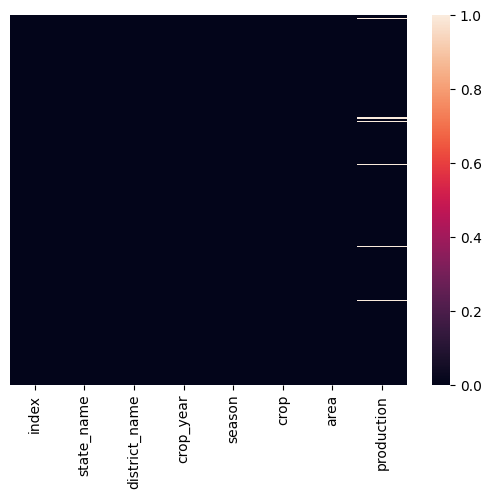

In [8]:
sns.heatmap(df.isnull(),yticklabels=False)

In [9]:
df['production'] = df['production'].fillna(0)
df['production'].isnull().sum()

0

## data cleanup

In [10]:
df['season'] = df['season'].replace({'Kharif':'Spring','Rabi':'Monsoon','Whole Year':'Whole Year','Summer':'Summer','Winter':'Winter','Autumn':'Autumn'}) 

In [11]:
 Data_frm_districts=df['district_name'].value_counts().sort_values().reset_index(name='count')

## Analysis on various cropfield enties state wise

In [12]:
state=df.groupby(['state_name'])['area'].sum().reset_index(name='area')
state['area'].sum()

2953786189.17

## Total Agricultural land in India is 2953786189.17 hectare

In [13]:
#Top 10 state based on agricultual land
state.sort_values(by='area',inplace=True,ascending=False)
state.iloc[:10]

,state_name,area
30,Uttar Pradesh,4.336316e+08
16,Madhya Pradesh,3.298131e+08
17,Maharashtra,3.222062e+08
25,Rajasthan,2.720249e+08
32,West Bengal,2.154052e+08
14,Karnataka,2.029101e+08
9,Gujarat,1.549440e+08
1,Andhra Pradesh,1.315458e+08
4,Bihar,1.282720e+08
24,Punjab,1.267256e+08


AttributeError: This method only works with the ScalarFormatter

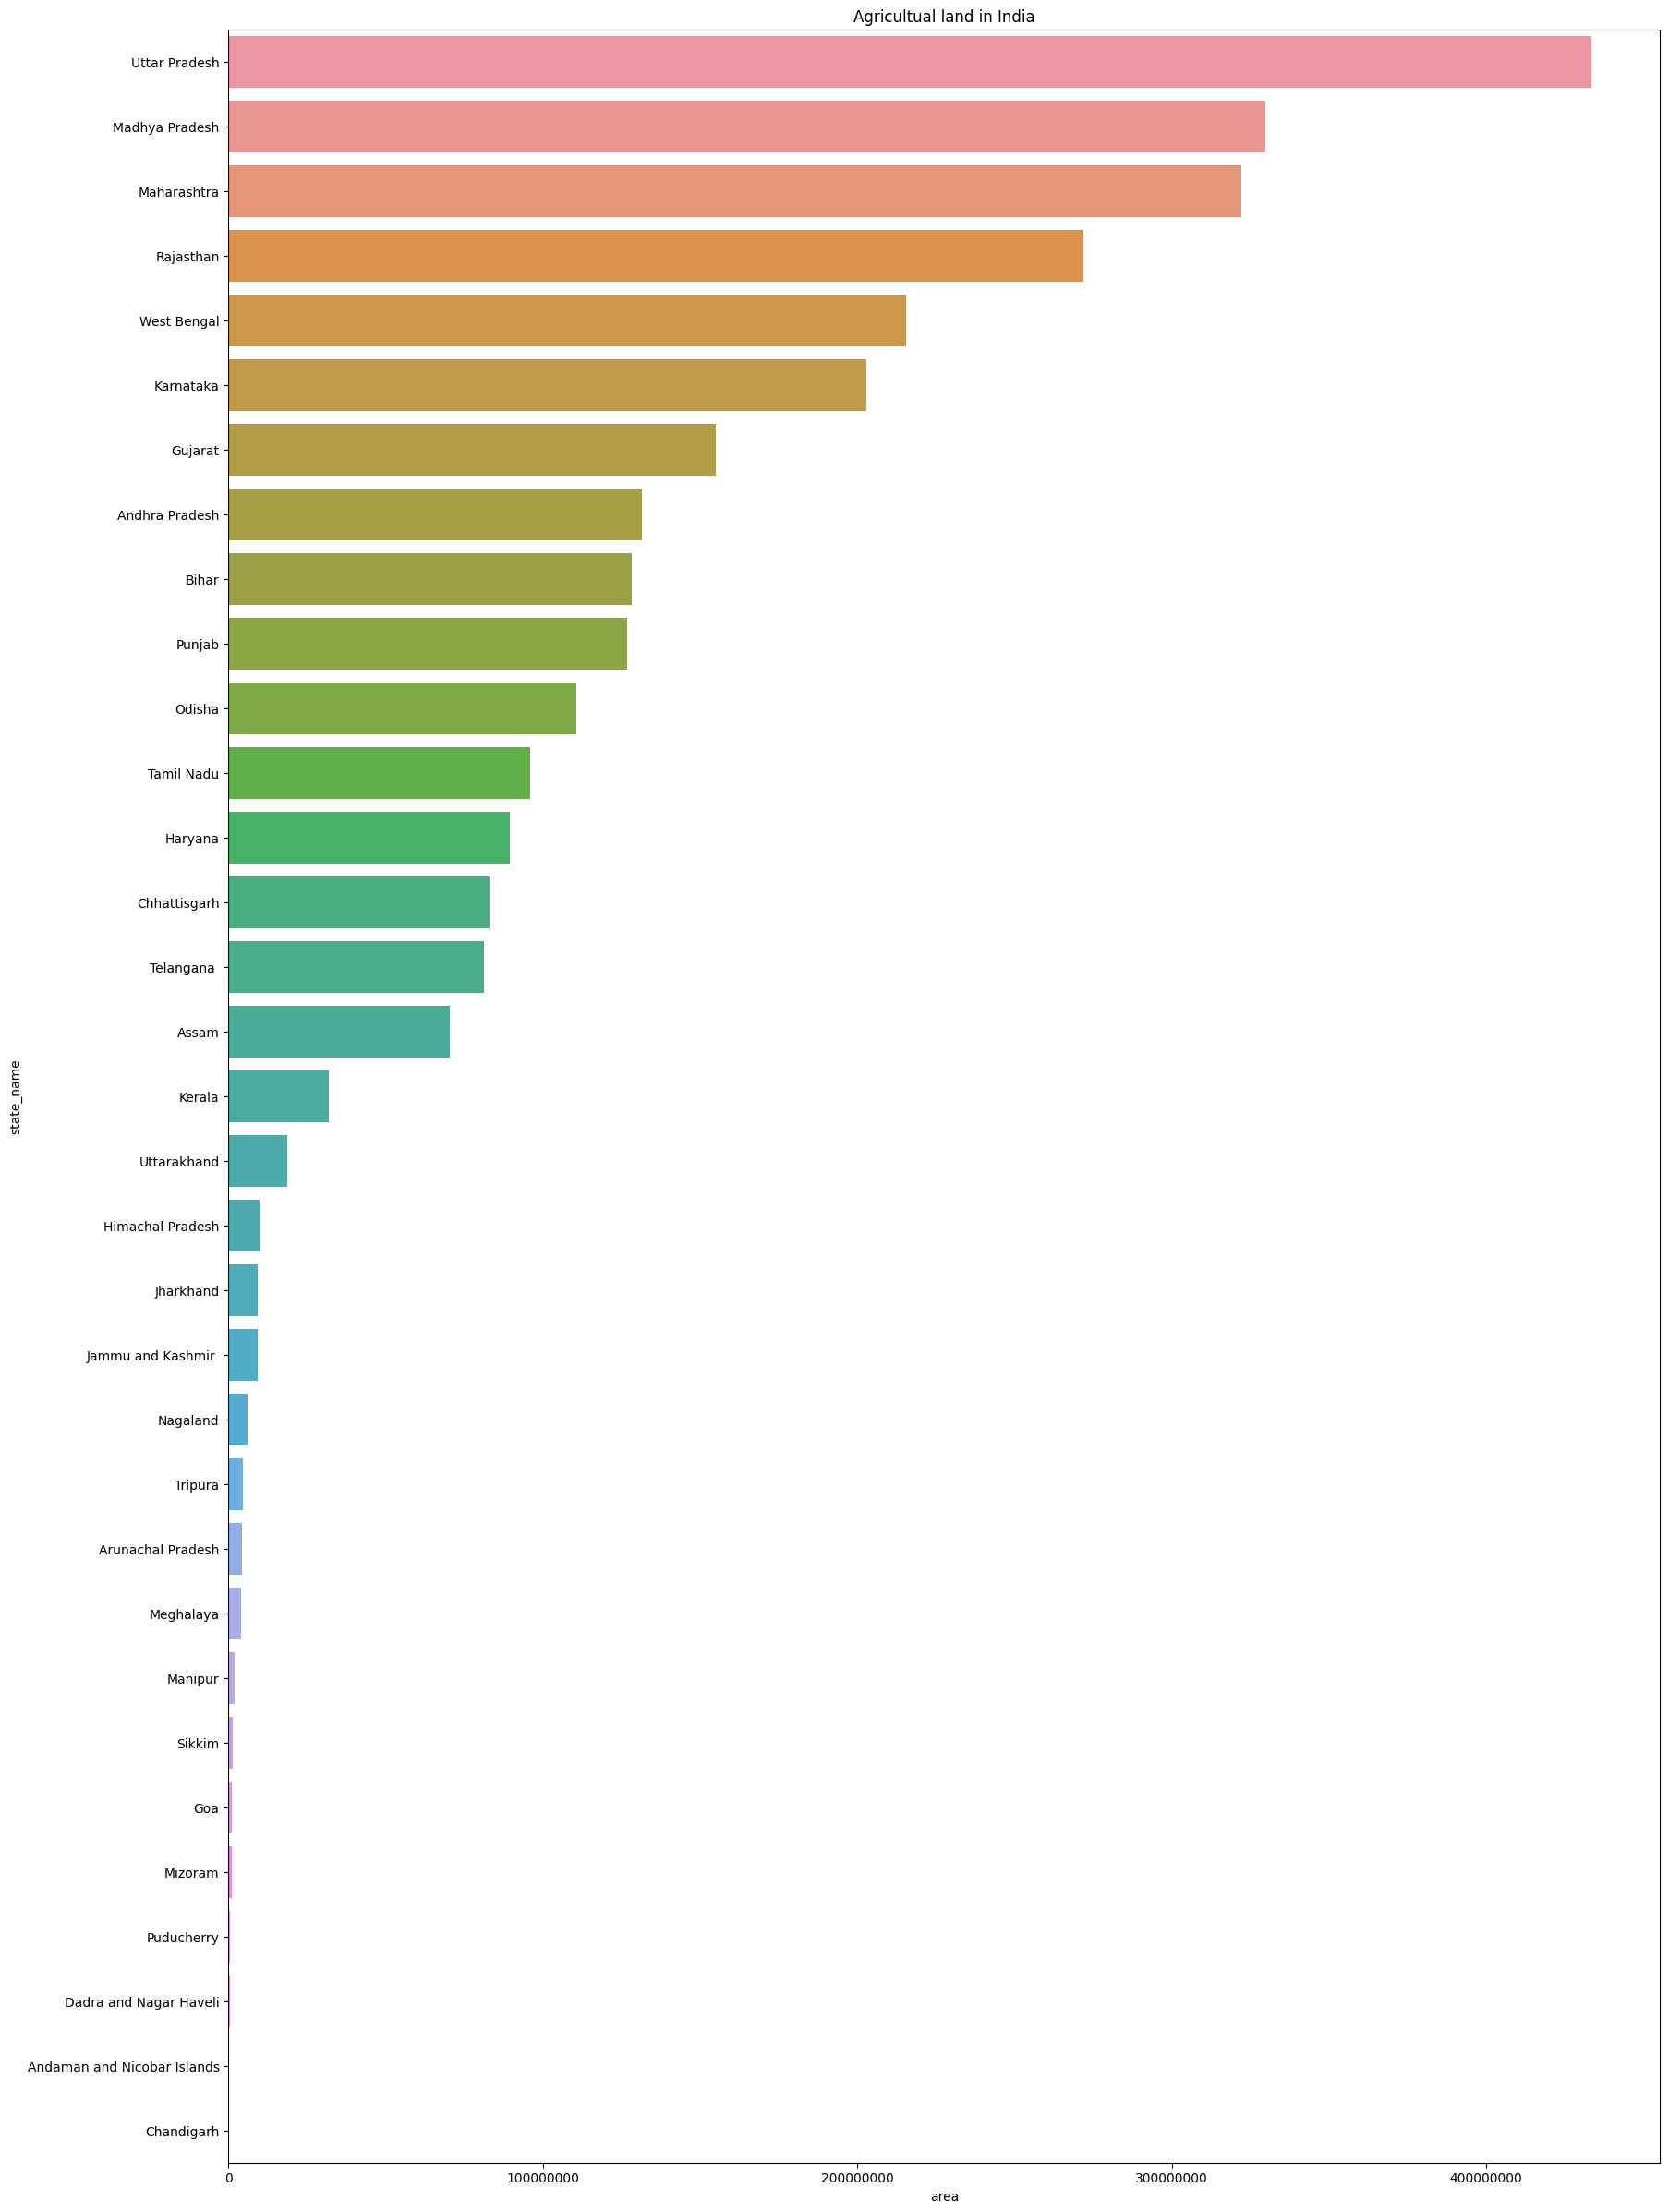

In [14]:
fig, ax=plt.subplots(figsize=(20,30))
sns.barplot(data=state,y="state_name",x="area").set(title="Agricultual land in India")
ax.ticklabel_format(style='plain')

## Top 10 Crop in india based on production

In [ ]:
crops = df.groupby(['crop'])['production'].sum().reset_index(name='production')
crops.sort_values(by='production',ascending=False,inplace=True)
X = crops[:10]

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
plt.style.use('fivethirtyeight')
ax = plt.bar(X['crop'],X['production'],width=0.5)
plt.xticks(ticks=X['crop'],rotation='vertical')
plt.tight_layout()
plt.show()

## Top 10 crop based on agricultural area

In [ ]:
crops = df.groupby(['crop'])['area'].sum().reset_index(name='area')
crops.sort_values(by='area',ascending=False,inplace=True)
Y = crops[:10]
Y

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
plt.style.use('fivethirtyeight')
width =0.5
ax= plt.bar(Y['crop'],Y['area'] ,width = width,)
ax = plt.plot(Y['crop'],Y['area'],label="Agricultural area in metric ton",color='#be4d25' )
plt.title("Top 10 crops in India based on Agricultural Land")
plt.xticks(ticks=Y['crop'],rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

# Crop production data in india year wise

In [ ]:
fil = (df['crop']=='Rice')
sugar_fil = (df['crop']=='Sugarcane')
gn_fil = (df['crop']=='Groundnut')
cotton_fil = (df['crop']=='Cotton(lint)')
wheat_fil = (df['crop']=='Wheat')

Rice = df.loc[fil,['state_name','crop_year','production']]
Sugar = df.loc[sugar_fil,['state_name','crop_year','production']]
gorund_nut = df.loc[gn_fil,['state_name','crop_year','production']]
cotton =df.loc[cotton_fil,['state_name','crop_year','production']]
wheat =df.loc[wheat_fil,['state_name','crop_year','production']]

In [ ]:
state_wise_R = Rice.groupby(['crop_year'])['production'].sum().reset_index(name='production')
state_wise_S = Sugar.groupby(['crop_year'])['production'].sum().reset_index(name='production')
state_wise_G = gorund_nut.groupby(['crop_year'])['production'].sum().reset_index(name='production')
state_wise_C = cotton.groupby(['crop_year'])['production'].sum().reset_index(name='production')
state_wise_W  = wheat.groupby(['crop_year'])['production'].sum().reset_index(name='production')

In [ ]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(10,8))
ax=plt.plot(state_wise_R['crop_year'],state_wise_R['production'],label ="Rice Production in metric ton")
ax=plt.plot(state_wise_S['crop_year'],state_wise_S['production'],label="Sugarcane production in metic ton")
ax=plt.plot(state_wise_G['crop_year'],state_wise_G['production'],label="Ground Nut production in metic ton")
ax=plt.plot(state_wise_W['crop_year'],state_wise_W['production'],label="Wheat Nut production in metic ton")
ax=plt.plot(state_wise_C['crop_year'],state_wise_C['production'],label="Cotton Nut production in metic ton")
plt.legend()
plt.xlabel("Crop_year")
plt.ylabel("Production in mertic ton X10^6")
plt.tight_layout()
plt.show()

### Crop production in india STATE WISE 

In [ ]:
crop_list = df['crop'].unique().tolist()
crop_list

In [ ]:
for z in crop_list:
    fil = (df['crop']==z)
    crop = df.loc[fil]
    crop_state = crop.groupby(['state_name'])['area'].sum().reset_index(name='area')
    label=crop_state['state_name'].tolist()
    #plotting the production data of different crops 
    plt.style.use('ggplot')
    fig, ax=plt.subplots(figsize=(20,10))
    x = crop_state['state_name']
    y = crop_state['area']/100000
    size = crop_state['area']/1000
    color = crop_state['area']/10000
    text = crop_state['state_name']
    title = "Agricultural land of " + z +" in Indian state"
    ax = plt.scatter(x,y,s=size,cmap='magma',c= color,alpha=0.7,edgecolors='black')
    plt.xticks(rotation='vertical')
    plt.ylabel("area in mega hectare = hectare/100000")
    plt.xlabel("Indian states")
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    cursor(hover=True)
    plt.show()

### Season wise Crop production

In [ ]:
filt = df.groupby(['season','crop','state_name'])['area'].sum().sort_values(ascending=False).reset_index(name='production')
filt.head()

In [ ]:
fig = px.scatter(filt,x="crop",y="state_name",color="season",size="production")
#fig.update_layout(scattermode="group")
fig.update_layout(autosize=True)
fig.show()

### bases on above data we can check which season is famous for crops

### Wheat and Rice is produced more in Rabi. Mustered in produced more during kharif in UP but it is produced more during winter in Odisha and Maharashtra


### Most of the indian states follow Kharif season for major crops 